<a href="https://colab.research.google.com/github/Marzban-io/Probabilistic-Models-and-Discriminant-Analysis/blob/main/Probabilistic-Models-and-Discriminant-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model fitting and classification

### 1: Model Fitting for Continuous Distributions – Multivariate Gaussian on Iris Data

This exercise involved applying model fitting techniques to a continuous dataset. I utilized a specialized subset of the well-known *Iris Plants Database* (from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/iris)), which included only two classes: *Iris Setosa* and *Iris Versicolour*. The analysis was based on two features per class: *petal length* (cm) and *petal width* (cm). The core objective was to model the probability distribution of these features for each class using multivariate Gaussian distributions, with the ultimate aim of enabling classification based on feature content.

**My approach and implemented tasks were:**

*   **Class-based Data Partitioning:** The dataset was initially separated into distinct subsets for *Iris Setosa* (class 0) and *Iris Versicolour* (class 1), allowing for independent class-conditional modeling.
*   **Exploratory Data Visualization:**
    *   Generated scatter plots using `plt.scatter()` to visualize the feature distribution for each class.
    *   Created histograms using `plt.hist()` to examine the individual distributions of petal length and petal width.
*   **Multivariate Gaussian Parameter Estimation:**
    *   For each class, I calculated the Maximum Likelihood Estimates (MLE) for the mean vector and the covariance matrix. These parameters define the class-conditional multivariate Gaussian distributions.
    *   An important part of this step was to consider whether the Gaussian model was an appropriate fit for the observed data characteristics.
*   **Visualization of Probability Density Functions:**
    *   Developed 2D visualizations of the joint PDFs for petal length and width for both *Iris Setosa* and *Iris Versicolour*, illustrating the learned Gaussian models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

Dataset1 = h5py.File("/content/Iris.hdf5")
Data = np.array(Dataset1.get('Dataset'))

<ipython-input-2-672f434e4ff1>:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


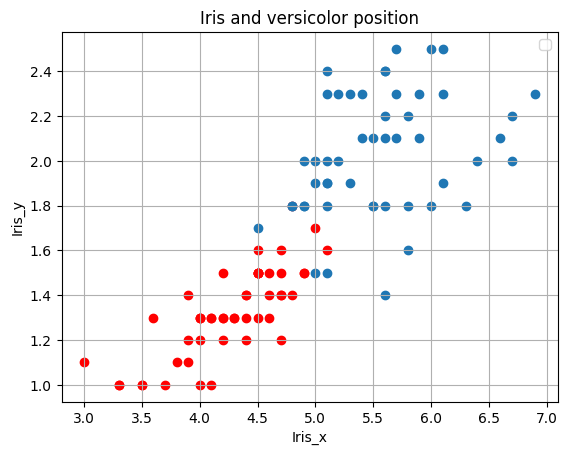

In [2]:
Iris_Setosa=[]
Iris_Versicolor=[]
for i in range(len(Data)):
    if Data[i, 2] == 0:
        Iris_Setosa.append(Data[i])
    else:
        Iris_Versicolor.append(Data[i])
Iris_Setosa_array=np.array(Iris_Setosa)
Iris_Versicolor_array=np.array(Iris_Versicolor)

plt.scatter(Iris_Setosa_array[:,0],Iris_Setosa_array[:,1],color="r")
plt.scatter(Iris_Versicolor_array[:,0],Iris_Versicolor_array[:,1])
plt.xlabel("Iris_x")
plt.ylabel("Iris_y")
plt.title("Iris and versicolor position")
plt.legend()
plt.grid()
plt.show()

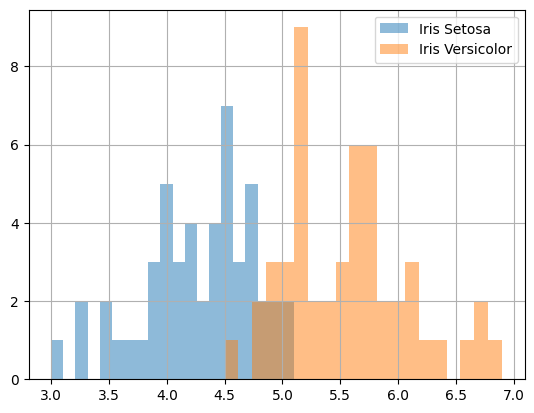

In [3]:
plt.hist(Iris_Setosa_array[:, 0], bins=20, alpha=0.5, label='Iris Setosa')
plt.hist(Iris_Versicolor_array[:, 0], bins=20, alpha=0.5, label='Iris Versicolor')
plt.xlabel("")
plt.ylabel("")
plt.legend()
plt.grid()
plt.show()

In [4]:
X_setosa=Iris_Setosa_array[:,0]
X_versicolor=Iris_Versicolor_array[:,0]

def mu(x):
    return np.mean(x)

setosa_mu=mu(X_setosa)
versicolor_mu=mu(X_versicolor)


def sigma(x, mu):
    return np.sqrt(np.mean((x - mu) ** 2))

setosa_sigma=sigma(X_setosa, setosa_mu)
versicolor_sigma=sigma(X_versicolor, versicolor_mu)

def gussian(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

setosa_gussian=gussian(X_setosa, setosa_mu, setosa_sigma)
versicolor_gussian=gussian(X_versicolor, versicolor_mu, versicolor_sigma)

cov_matrix = np.cov(Data[:,0:2], rowvar=False)
mean_X = np.mean(Data[:,0:2], axis=0)

X_centered = Data[:,0:2] - mean_X

covariance_matrix = np.zeros((2, 2))
for i in range(2):
    for j in range(2):
        covariance_matrix[i, j] = np.sum(X_centered[:, i] * X_centered[:, j]) / (Data.shape[0] - 1)

print("Covariance matrix with numpy: ")
print(cov_matrix)
print("Covariance matrix calculated manually is: ")
print(covariance_matrix)
print("variance x is: ")
print(covariance_matrix[0,0])
print("variance y is: ")
print(covariance_matrix[1,1])
print("covariance x and y is: ")
print(covariance_matrix[0,1])

print("setosa_mu(mean): ", setosa_mu)
print("setosa_sigma(std): ", setosa_sigma)
print("versicolor_mu(mean): ", versicolor_mu)
print("versicolor_sigma(std): ", versicolor_sigma)
print("setosa_gussian(gussian pdf): ", setosa_gussian)
print("versicolor_gussian(gussian pdf): ", versicolor_gussian)

Covariance matrix with numpy: 
[[0.6815798  0.28873131]
 [0.28873131 0.18042828]]
Covariance matrix calculated manually is: 
[[0.6815798  0.28873131]
 [0.28873131 0.18042828]]
variance x is: 
0.6815797979797981
variance y is: 
0.18042828282828283
covariance x and y is: 
0.2887313131313131
setosa_mu(mean):  4.26
setosa_sigma(std):  0.4651881339845203
versicolor_mu(mean):  5.552
versicolor_sigma(std):  0.546347874526844
setosa_gussian(gussian pdf):  [0.22578077 0.63567323 0.8504896  0.73358089 0.54829328 0.80833808
 0.54829328 0.41552634 0.81962228 0.16797512 0.75072787 0.52595764
 0.80833808 0.33286418 0.75072787 0.75072787 0.75072787 0.54829328
 0.80833808 0.75072787 0.75072787 0.85442887 0.43719434 0.73358089
 0.10197627 0.22578077 0.65657186 0.81962228 0.65657186 0.10197627
 0.54829328 0.02188766 0.24198617 0.31345651 0.73358089 0.63567323
 0.8504896  0.81962228 0.8504896  0.43719434 0.75072787 0.63567323
 0.85442887 0.54829328 0.73358089 0.33286418 0.81962228 0.73358089
 0.65657186 

Text(0.5, 0.92, '3D Scatter Plot Iris_Versicolor')

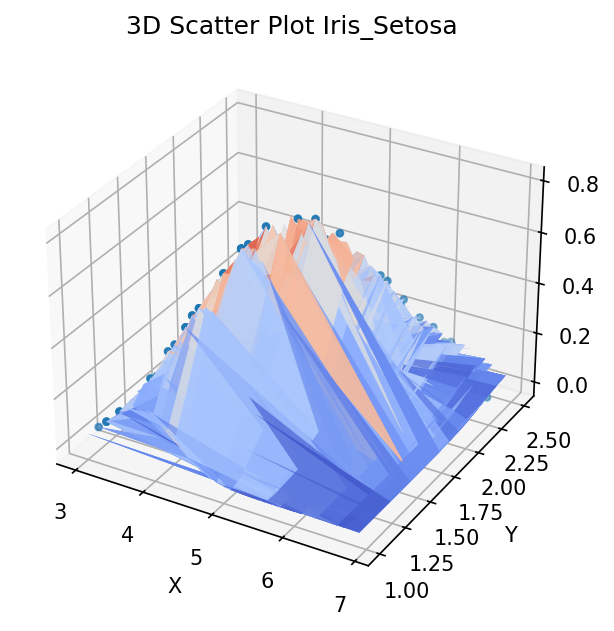

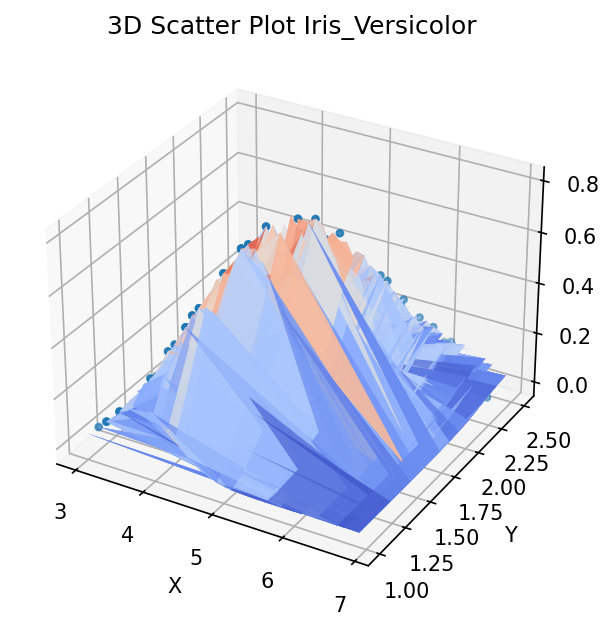

In [6]:
from scipy.stats import multivariate_normal
from matplotlib import cm
from matplotlib.ticker import LinearLocator

Data_mean=np.mean(Data[:,0:2], axis=0)

pdf_class0 = multivariate_normal(Data_mean,cov_matrix)
pdf_class1 = multivariate_normal(Data_mean,cov_matrix)

X =Data[:,0]
Y =Data[:,1]

X, Y = np.meshgrid(X, Y)
X_flat = X.flatten()
Y_flat = Y.flatten()
XY_list = np.concatenate((X_flat[:,np.newaxis],Y_flat[:,np.newaxis]),axis=1)

PDF_values_x = np.reshape(pdf_class0.pdf(XY_list), np.shape(X))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, dpi=150)
ax.plot_surface(X, Y, PDF_values_x, cmap=cm.coolwarm, alpha=0.7, linewidth=0)
ax.scatter3D(Data[:, 0], Data[:, 1], pdf_class0.pdf(Data[:, 0:2]), s=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot Iris_Setosa')

PDF_values_y = np.reshape(pdf_class1.pdf(XY_list), np.shape(X))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, dpi=150)
ax.plot_surface(X, Y, PDF_values_y, cmap=cm.coolwarm, alpha=0.7, linewidth=0)
ax.scatter3D(Data[:, 0], Data[:, 1], pdf_class1.pdf(Data[:, 0:2]), s=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot Iris_Versicolor')

** 2: Bernoulli Model Fitting for SMS Spam Detection (Bag of Words)


In this exercise, you will employ a real dataset (file *SMSSpamCollection*). The SMS Spam Collection v.1 (https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset) is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.
Task: you have to fit the parameters employed by a Naïve Bayes Classifier, using a Bernoulli model. Under this model, the parameters are:

*   $\pi_{c}$, the prior probabilities of each class.
*   $\theta_{jc}$, the probability that feature j is equal to 1 in class c.

Model fitting can be done using the pseudocode at the end of the Lecture 3 slides.

Display the class-conditional densities $\theta_{jc1}$ and $\theta_{jc2}$. Try to identify “uninformative” features (i.e., features j such that $\theta_{jc1}$ ≃ $\theta_{jc2}$).

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

data = pd.read_csv("SMSSpamCollection", encoding="ISO-8859-1", sep="\t", header=None)
data.rename(columns={0: "labels", 1: "text"}, inplace=True)
display(data)

bagger = CountVectorizer(
    max_features=2500,
    binary=True,
    token_pattern=r"(?u)\b[a-zA-Z][a-zA-Z]+\b",
)
bag = bagger.fit_transform(data["text"]).toarray()
feature_names = bagger.get_feature_names_out()

data = pd.concat([data, pd.DataFrame(bag, columns=feature_names)], axis=1)
display(data)

X_train = data.iloc[:2000,2:].to_numpy()
X_test = data.iloc[2000:3000,2:].to_numpy()
y_train = data.iloc[:2000,0].to_numpy() == 'ham'
y_test = data.iloc[2000:3000,0].to_numpy() == 'ham'

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


,labels,text,aah,aathi,abi,abiola,able,about,abt,ac,...,yogasana,you,your,yours,yourself,yr,yrs,yun,yup,zed
0,ham,"Go until jurong point, crazy.. Available only ...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,Ok lar... Joking wif u oni...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,U dun say so early hor... U c already then say...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,ham,Will Ã¼ b going to esplanade fr home?,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,ham,The guy did some bitching but I acted like i'd...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**3 - Classification – discrete data**

In this exercise, I will design a Naïve Bayes Classifier (NBC) for the Bag of Words (BoW) features for document classification that have been prepared in *section 2*. In particular, in *section 2*, you have already estimated the following parameters:


*   The prior probabilities of each class, $\pi_{c} = p(y=c)$.
*   The class-conditional probabilities of each feature, $\theta_{jc} = p(x_{j}=1 | y=c)$.

These parameters have been estimated from the training data. In this part, I will use the test data, and classify each test vector using an NBC whose model has been fitted in *Exercise 2*. In particular, I will do the following:



*   For each test vector, calculate the MAP estimate of the class the test vector belongs to. Remember: the MAP classifier chooses the class that maximizes $\mathop{\max\limits_c{\log p(y=c|x)} \propto \log p(x|y=c)} + \log p(c)$. In the NBC, the features (i.e. each entry of $x$) are assumed to be statistically independent, so $p(x|y=c) = \prod_{j=1}^{D}p(x_{j}|y=c)$. This formula allows you to calculate $p(x|y=c)$ for a given test vector $x$ using the parameters $\theta_{jc}$ already calculated in *Exercise 2*. Note that, after the logarithm, the product
becomes a summation. It is much better to use the logarithm in order to avoid underflow.
*   See how the accuracy changes when the prior is not taken into account (e.g. by comparing the MLE and MAP estimate).
*   After classifying a test vector using the NBC, the obtained class can be compared with the truth (vector *ytest*).
*   The accuracy of the classifier can be computed as the percentage of times that the NBC provides the correct class for a test vector.
*   Repeat the same operations using the training data as test data, and compare the accuracy of the classifier on the training and test data.
*   Note: I implement the Naive Bayes classifier from scratch without using pre-made functions such as sklearn.naive_bayes

I plot the class-conditional densities as done at the end of section 2, you will see that many features are uninformative; e.g., words that appear very often (or very rarely) in documents belonging to either class are not very helpful to classify a document. The NBC can perform a lot better if these uninformative features are disregarded during the classification, i.e. only a subset of the features, chosen among the most informative ones, are retained. To rank the features by “significance”, one can employ the mutual information between feature $x_{j}$ and class $y$:

\begin{align*}
I(X,Y) = \sum_{xj} \sum_{y}p(x_{j},y) \log \frac{p(x_{j},y)}{p(x_{j})p(y)}
\end{align*}

For binary features, the mutual information of feature j can be written as:

\begin{align*}
I_{j} = \sum_{c} \left[\theta_{jc}\pi_{c}\log \frac{\theta_{jc}}{\theta_{j}}+ (1 - \theta_{jc})\pi_{c} \log \frac{1 - \theta_{jc}}{1 - \theta_{j}}\right]
\end{align*}

with $\theta_{j}=p(x_{j}=1)=\sum_{c}\pi_{c}\theta_{jc}$. For this part:


*   Calculate $I_{j}$ for all features. Note: try to avoid divisions by zero adding the machine precision constant *eps* to the denominators.
*   Rank the features by decreasing values of $I_{j}$, and keep only the $K$ most important ones.

*    Run the classifier employing only the $K$ most important features, and calculate the accuracy.

*    Plot the accuracy as a function of $K$.

Prior P(ham): 0.8600, Prior P(spam): 0.1400
Shape of theta_jc_ham_array: (2500,)
Shape of theta_jc_spam_array: (2500,)

--- Classification on Test Set ---
MAP Accuracy on Test Set: 0.9690
MLE-equivalent Accuracy on Test Set: 0.9710

--- Classification on Training Set (for comparison) ---
MAP Accuracy on Training Set: 0.9870

--- Optional: Feature Selection with Mutual Information ---


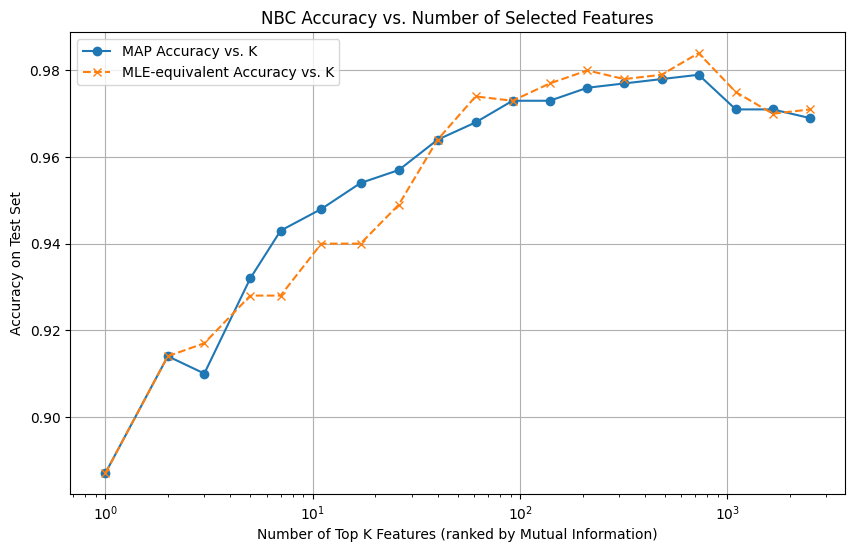


Top 10 most informative features (by Mutual Information):
- call: MI = 0.0612
- txt: MI = 0.0600
- free: MI = 0.0500
- claim: MI = 0.0432
- www: MI = 0.0391
- to: MI = 0.0365
- prize: MI = 0.0289
- mobile: MI = 0.0280
- uk: MI = 0.0258
- or: MI = 0.0239


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

if 'X_train' not in locals():
    print("Warning: Using dummy data for X_train, y_train, etc. Ensure Ex2 variables are loaded.")
    num_train_samples = 2000
    num_test_samples = 1000
    num_features = 100
    X_train = np.random.randint(0, 2, size=(num_train_samples, num_features))
    y_train = np.random.choice([True, False], size=num_train_samples)
    X_test = np.random.randint(0, 2, size=(num_test_samples, num_features))
    y_test = np.random.choice([True, False], size=num_test_samples)
    feature_names = [f"feature_{i}" for i in range(num_features)]

eps = 1e-9

N_train_total = len(y_train)
N_ham_train = np.sum(y_train)
N_spam_train = N_train_total - N_ham_train

pi_c_ham = N_ham_train / N_train_total
pi_c_spam = N_spam_train / N_train_total

X_train_ham = X_train[y_train == True]
X_train_spam = X_train[y_train == False]

theta_jc_ham_array = (np.sum(X_train_ham, axis=0) + 1) / (N_ham_train + 2)
theta_jc_spam_array = (np.sum(X_train_spam, axis=0) + 1) / (N_spam_train + 2)

print(f"Prior P(ham): {pi_c_ham:.4f}, Prior P(spam): {pi_c_spam:.4f}")
print(f"Shape of theta_jc_ham_array: {theta_jc_ham_array.shape}")
print(f"Shape of theta_jc_spam_array: {theta_jc_spam_array.shape}")

def calculate_log_likelihood(x_instance, theta_jc_class_array):
    log_likelihood = np.sum(
        x_instance * np.log(theta_jc_class_array + eps) +
        (1 - x_instance) * np.log(1 - theta_jc_class_array + eps)
    )
    return log_likelihood

def predict_nbc(X_data, pi_c_ham, pi_c_spam, theta_jc_ham, theta_jc_spam, use_priors=True):
    predictions = []
    for x_instance in X_data:
        log_likelihood_ham = calculate_log_likelihood(x_instance, theta_jc_ham)
        log_likelihood_spam = calculate_log_likelihood(x_instance, theta_jc_spam)

        if use_priors:
            log_posterior_ham = log_likelihood_ham + np.log(pi_c_ham + eps)
            log_posterior_spam = log_likelihood_spam + np.log(pi_c_spam + eps)
        else: # MLE-equivalent (no priors)
            log_posterior_ham = log_likelihood_ham
            log_posterior_spam = log_likelihood_spam

        if log_posterior_ham > log_posterior_spam:
            predictions.append(True) # Predict ham
        else:
            predictions.append(False) # Predict spam
    return np.array(predictions)

def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

print("\n--- Classification on Test Set ---")
y_pred_map_test = predict_nbc(X_test, pi_c_ham, pi_c_spam, theta_jc_ham_array, theta_jc_spam_array, use_priors=True)
accuracy_map_test = calculate_accuracy(y_test, y_pred_map_test)
print(f"MAP Accuracy on Test Set: {accuracy_map_test:.4f}")

y_pred_mle_test = predict_nbc(X_test, pi_c_ham, pi_c_spam, theta_jc_ham_array, theta_jc_spam_array, use_priors=False)
accuracy_mle_test = calculate_accuracy(y_test, y_pred_mle_test)
print(f"MLE-equivalent Accuracy on Test Set: {accuracy_mle_test:.4f}")


print("\n--- Classification on Training Set (for comparison) ---")
y_pred_map_train = predict_nbc(X_train, pi_c_ham, pi_c_spam, theta_jc_ham_array, theta_jc_spam_array, use_priors=True)
accuracy_map_train = calculate_accuracy(y_train, y_pred_map_train)
print(f"MAP Accuracy on Training Set: {accuracy_map_train:.4f}")


print("\n--- Optional: Feature Selection with Mutual Information ---")

theta_j_array = pi_c_ham * theta_jc_ham_array + pi_c_spam * theta_jc_spam_array

mutual_information_array = np.zeros_like(theta_j_array)

term1 = theta_jc_ham_array * pi_c_ham * np.log((theta_jc_ham_array + eps) / (theta_j_array + eps) + eps)

term2 = (1 - theta_jc_ham_array) * pi_c_ham * np.log(((1 - theta_jc_ham_array) + eps) / ((1 - theta_j_array) + eps) + eps)

term3 = theta_jc_spam_array * pi_c_spam * np.log((theta_jc_spam_array + eps) / (theta_j_array + eps) + eps)

term4 = (1 - theta_jc_spam_array) * pi_c_spam * np.log(((1 - theta_jc_spam_array) + eps) / ((1 - theta_j_array) + eps) + eps)

mutual_information_array = term1 + term2 + term3 + term4

mutual_information_array = np.nan_to_num(mutual_information_array, nan=0.0, posinf=0.0, neginf=0.0)

# Rank features by decreasing MI
sorted_feature_indices = np.argsort(mutual_information_array)[::-1]
# Plot accuracy as a function of K (number of most important features)
K_values = []
accuracies_vs_K_map = []
accuracies_vs_K_mle = []
# Define a range for K, e.g., from 1 to num_features, or a subset
num_features_total = X_train.shape[1]
# For plotting, we can use a step, e.g., every 10 or 50 features, or a log scale if D is large
if num_features_total <= 200:
    k_step = 5
    k_range = range(1, num_features_total + 1, k_step)
    if num_features_total not in k_range: # Ensure the last K (all features) is included
        k_range = list(k_range) + [num_features_total]
else: # For larger number of features, sample K values more sparsely
    k_range = np.logspace(0, np.log10(num_features_total), num=20, dtype=int)
    k_range = np.unique(np.clip(k_range, 1, num_features_total)) # Ensure K is at least 1 and unique

for K in k_range:
    if K == 0: continue # Skip K=0
    K_values.append(K)
    current_feature_indices = sorted_feature_indices[:K]

    X_train_subset = X_train[:, current_feature_indices]
    X_test_subset = X_test[:, current_feature_indices]

    theta_jc_ham_subset = theta_jc_ham_array[current_feature_indices]
    theta_jc_spam_subset = theta_jc_spam_array[current_feature_indices]

    y_pred_map_k = predict_nbc(X_test_subset, pi_c_ham, pi_c_spam, theta_jc_ham_subset, theta_jc_spam_subset, use_priors=True)
    accuracies_vs_K_map.append(calculate_accuracy(y_test, y_pred_map_k))

    y_pred_mle_k = predict_nbc(X_test_subset, pi_c_ham, pi_c_spam, theta_jc_ham_subset, theta_jc_spam_subset, use_priors=False)
    accuracies_vs_K_mle.append(calculate_accuracy(y_test, y_pred_mle_k))

if K_values: # Check if K_values is not empty before plotting
    plt.figure(figsize=(10, 6))
    plt.plot(K_values, accuracies_vs_K_map, marker='o', label='MAP Accuracy vs. K')
    plt.plot(K_values, accuracies_vs_K_mle, marker='x', linestyle='--', label='MLE-equivalent Accuracy vs. K')
    plt.xlabel("Number of Top K Features (ranked by Mutual Information)")
    plt.ylabel("Accuracy on Test Set")
    plt.title("NBC Accuracy vs. Number of Selected Features")
    plt.legend()
    plt.grid(True)
    if num_features_total > 200 : plt.xscale('log') # Use log scale for x-axis if K range is large
    plt.show()

    # Display some of the top features and their MI
    print("\nTop 10 most informative features (by Mutual Information):")
    for i in range(min(10, len(sorted_feature_indices))):
        idx = sorted_feature_indices[i]
        if idx < len(feature_names): # Check if index is within bounds of feature_names
             print(f"- {feature_names[idx]}: MI = {mutual_information_array[idx]:.4f}")
        else:
            print(f"- Feature index {idx} (name unavailable): MI = {mutual_information_array[idx]:.4f}")
else:
    print("No K values to plot for MI feature selection.")

** 4 – Classification – continuous data**

This part employs the Iris dataset already employed in section 1, and performs model fitting and classification using several versions of **Gaussian discriminative analysis**. However, for this exercise the available data have to be divided into two sets, namely *training* and *test* data.

You will have to 1) re-fit the training data to the specific model (see below), 2) classify each of the test samples, and 3) calculate the accuracy of each classifier.

Classifiers to be employed:
*   Two-class quadratic discriminant analysis (fitting: both mean values and covariance matrices are class-specific – same as in exercise 1).
*   Two-class linear discriminant analysis (fitting: class-specific mean values as in the previous case. Shared covariance matrix is calculated putting together the elements of both classes; the mean values should also be recalculated accordingly).

QDA Accuracy (from scratch): 0.9000
LDA Accuracy (from scratch, direct shared cov): 0.9000


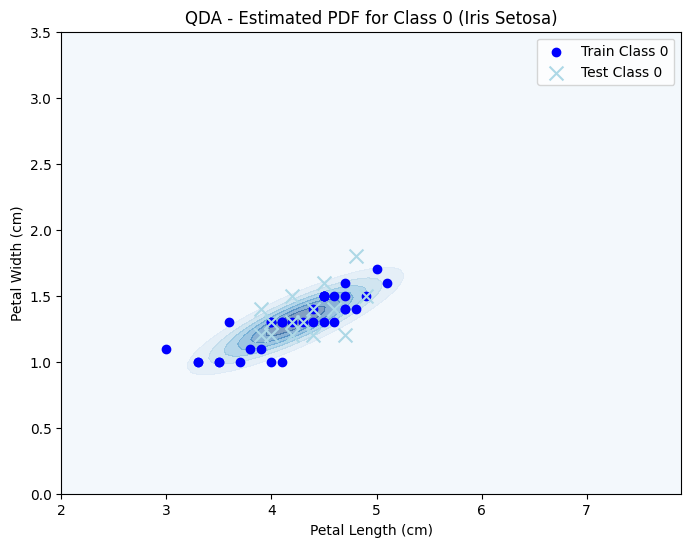

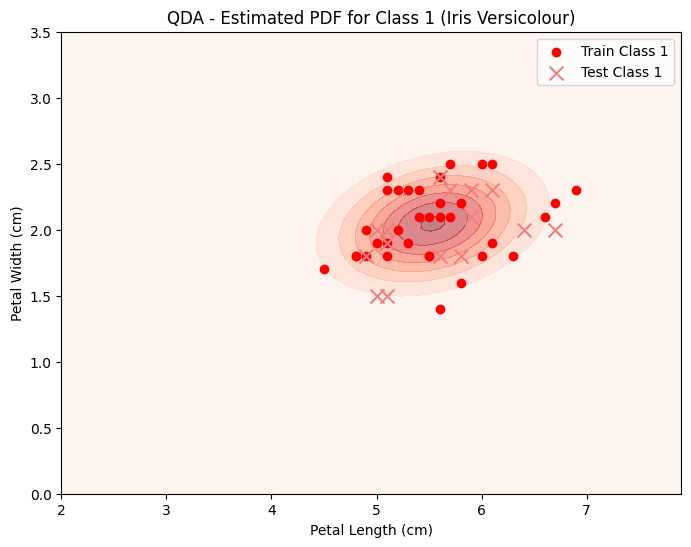

In [26]:
from scipy.stats import multivariate_normal
from matplotlib import cm # For PDF visualization if you choose to do it

Dataset1 = h5py.File("Iris.hdf5", "r") # Make sure path is correct
Data = np.array(Dataset1.get('Dataset'))

num_samples_total = Data.shape[0]
num_train_samples = 70 # Adjust as needed or per specific lab instructions if provided
num_test_samples = num_samples_total - num_train_samples

Train_data_full = Data[:num_train_samples, :]
Test_data_full = Data[num_train_samples:, :]

# Separate features and labels
X_train = Train_data_full[:, :2]
y_train = Train_data_full[:, 2].astype(int) # Labels are 0 or 1

X_test = Test_data_full[:, :2]
y_test = Test_data_full[:, 2].astype(int)

# Separate training data by class for parameter estimation
X_train_class0 = X_train[y_train == 0]
X_train_class1 = X_train[y_train == 1]

eps = 1e-9 # Small constant for numerical stability

mu0_qda = np.mean(X_train_class0, axis=0)
mu1_qda = np.mean(X_train_class1, axis=0)

cov0_qda = np.cov(X_train_class0, rowvar=False)
cov1_qda = np.cov(X_train_class1, rowvar=False)

N0_train_qda = X_train_class0.shape[0]
N1_train_qda = X_train_class1.shape[0]
N_total_train_qda = N0_train_qda + N1_train_qda

prior0_qda = N0_train_qda / N_total_train_qda
prior1_qda = N1_train_qda / N_total_train_qda

y_pred_qda = []
for x_instance in X_test:

    # For class 0
    try:
        inv_cov0_qda = np.linalg.inv(cov0_qda)
        det_cov0_qda = np.linalg.det(cov0_qda)
        if det_cov0_qda <= 0: # Handle non-positive determinant
             log_det_cov0_qda = -np.inf
        else:
            log_det_cov0_qda = np.log(det_cov0_qda)

        term1_0 = -0.5 * log_det_cov0_qda
        term2_0 = -0.5 * (x_instance - mu0_qda).T @ inv_cov0_qda @ (x_instance - mu0_qda)
        term3_0 = np.log(prior0_qda + eps)
        g0_qda = term1_0 + term2_0 + term3_0
    except np.linalg.LinAlgError: # If covariance matrix is singular
        g0_qda = -np.inf

    # For class 1
    try:
        inv_cov1_qda = np.linalg.inv(cov1_qda)
        det_cov1_qda = np.linalg.det(cov1_qda)
        if det_cov1_qda <= 0:
            log_det_cov1_qda = -np.inf
        else:
            log_det_cov1_qda = np.log(det_cov1_qda)

        term1_1 = -0.5 * log_det_cov1_qda
        term2_1 = -0.5 * (x_instance - mu1_qda).T @ inv_cov1_qda @ (x_instance - mu1_qda)
        term3_1 = np.log(prior1_qda + eps)
        g1_qda = term1_1 + term2_1 + term3_1
    except np.linalg.LinAlgError:
        g1_qda = -np.inf

    if g0_qda > g1_qda:
        y_pred_qda.append(0)
    else:
        y_pred_qda.append(1)

accuracy_qda = np.mean(np.array(y_pred_qda) == y_test)
print(f"QDA Accuracy (from scratch): {accuracy_qda:.4f}")

mu0_lda = np.mean(X_train_class0, axis=0) # Same as QDA
mu1_lda = np.mean(X_train_class1, axis=0) # Same as QDA

cov_shared_lda_direct = np.cov(X_train, rowvar=False)
# cov_shared_lda_direct += np.eye(cov_shared_lda_direct.shape[0]) * eps # Regularization

cov_shared_lda = cov_shared_lda_direct # Using the direct one for this interpretation

prior0_lda = prior0_qda # Priors are the same
prior1_lda = prior1_qda

y_pred_lda = []
for x_instance in X_test:

    try:
        inv_cov_shared_lda = np.linalg.inv(cov_shared_lda)

        g0_lda = mu0_lda.T @ inv_cov_shared_lda @ x_instance - 0.5 * mu0_lda.T @ inv_cov_shared_lda @ mu0_lda + np.log(prior0_lda + eps)
        g1_lda = mu1_lda.T @ inv_cov_shared_lda @ x_instance - 0.5 * mu1_lda.T @ inv_cov_shared_lda @ mu1_lda + np.log(prior1_lda + eps)
    except np.linalg.LinAlgError:
        g0_lda = -np.inf
        g1_lda = -np.inf # Or handle based on priors if one cov is okay

    if g0_lda > g1_lda:
        y_pred_lda.append(0)
    else:
        y_pred_lda.append(1)

accuracy_lda = np.mean(np.array(y_pred_lda) == y_test)
print(f"LDA Accuracy (from scratch, direct shared cov): {accuracy_lda:.4f}")

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# PDF for QDA Class 0
# Note: Ensure cov0_qda is positive definite for multivariate_normal
try:
    pdf_qda_class0_func = multivariate_normal(mean=mu0_qda, cov=cov0_qda, allow_singular=True)
    Z_qda0 = pdf_qda_class0_func.pdf(np.c_[xx.ravel(), yy.ravel()])
    Z_qda0 = Z_qda0.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z_qda0, cmap=plt.cm.Blues, alpha=0.5)
    plt.scatter(X_train_class0[:, 0], X_train_class0[:, 1], c='blue', marker='o', label='Train Class 0')
    plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], c='lightblue', marker='x', s=100, label='Test Class 0')
    plt.title("QDA - Estimated PDF for Class 0 (Iris Setosa)")
    plt.xlabel("Petal Length (cm)")
    plt.ylabel("Petal Width (cm)")
    plt.legend()
    plt.show()
except np.linalg.LinAlgError:
    print("Could not plot PDF for QDA Class 0 due to singular covariance matrix.")
except ValueError as e:
    print(f"Could not plot PDF for QDA Class 0: {e}")


# PDF for QDA Class 1
try:
    pdf_qda_class1_func = multivariate_normal(mean=mu1_qda, cov=cov1_qda, allow_singular=True)
    Z_qda1 = pdf_qda_class1_func.pdf(np.c_[xx.ravel(), yy.ravel()])
    Z_qda1 = Z_qda1.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z_qda1, cmap=plt.cm.Reds, alpha=0.5)
    plt.scatter(X_train_class1[:, 0], X_train_class1[:, 1], c='red', marker='o', label='Train Class 1')
    plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], c='lightcoral', marker='x', s=100, label='Test Class 1')

    plt.title("QDA - Estimated PDF for Class 1 (Iris Versicolour)")
    plt.xlabel("Petal Length (cm)")
    plt.ylabel("Petal Width (cm)")
    plt.legend()
    plt.show()
except np.linalg.LinAlgError:
    print("Could not plot PDF for QDA Class 1 due to singular covariance matrix.")
except ValueError as e:
    print(f"Could not plot PDF for QDA Class 1: {e}")

### 5: Applying and Comparing Classification Algorithms on Continuous Phoneme Data

For this part, I applied several classification techniques to the continuous phoneme dataset introduced in Lab 1. The classifiers I implemented and evaluated were Quadratic Discriminant Analysis (QDA), Linear Discriminant Analysis (LDA), and a Naive Bayes model, using tools from the `sklearn` library.

An important consideration was that these models, due to their generally lower computational complexity compared to k-NN, allowed for training on a more substantial portion of the dataset than was feasible in Lab 1.

**My process involved:**

*   Utilizing `sklearn` to implement QDA, LDA, and Naive Bayes classifiers.
*   Training each model on the designated phoneme training set.
*   Computing the classification accuracy for each model on the test set.
*   Performing a direct comparison of these accuracies with the accuracy obtained from the k-NN classifier in Lab 1, to assess their relative effectiveness on this continuous data problem.

Training data shape: Features (4000, 256), Labels (4000,)
Testing data shape: Features (509, 256), Labels (509,)
------------------------------
Linear Discriminant Analysis (LDA)
LDA Accuracy: 0.9411
------------------------------
Quadratic Discriminant Analysis (QDA)
QDA Accuracy: 0.8880
------------------------------
Gaussian Naive Bayes (GNB)
GNB Accuracy: 0.9018
------------------------------
k-Nearest Neighbors (k-NN)
k-NN (k=5) Accuracy: 0.9293
------------------------------


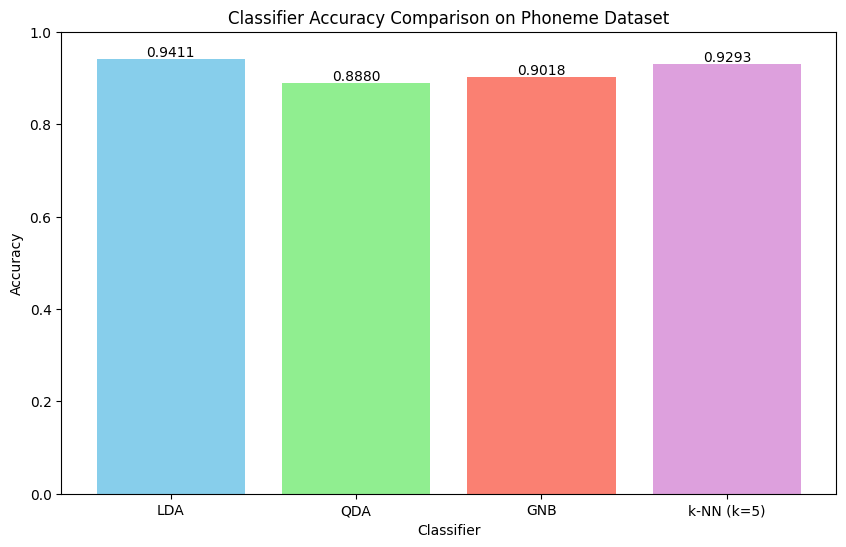

In [29]:
Dataset2 = h5py.File("phoneme.hdf5", "r")
Data = np.array(Dataset2.get('Dataset'))

Train = Data[:4000,:]
Test = Data[4000:,:]

X_train_features = Train[:, :-1]
y_train_labels = Train[:, -1]

X_test_features = Test[:, :-1]
y_test_labels = Test[:, -1]

print(f"Training data shape: Features {X_train_features.shape}, Labels {y_train_labels.shape}")
print(f"Testing data shape: Features {X_test_features.shape}, Labels {y_test_labels.shape}")
print("-" * 30)

accuracies = {}
method_names_plot = []
accuracies_plot = []

print("Linear Discriminant Analysis (LDA)")
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train_features, y_train_labels)
y_pred_lda = clf_lda.predict(X_test_features)
accuracy_lda = metrics.accuracy_score(y_test_labels, y_pred_lda)
accuracies['LDA'] = accuracy_lda
method_names_plot.append('LDA')
accuracies_plot.append(accuracy_lda)
print(f"LDA Accuracy: {accuracy_lda:.4f}")
print("-" * 30)

print("Quadratic Discriminant Analysis (QDA)")
clf_qda = QuadraticDiscriminantAnalysis()
clf_qda.fit(X_train_features, y_train_labels)
y_pred_qda = clf_qda.predict(X_test_features)
accuracy_qda = metrics.accuracy_score(y_test_labels, y_pred_qda)
accuracies['QDA'] = accuracy_qda
method_names_plot.append('QDA')
accuracies_plot.append(accuracy_qda)
print(f"QDA Accuracy: {accuracy_qda:.4f}")
print("-" * 30)

print("Gaussian Naive Bayes (GNB)")
clf_gnb = GaussianNB()
clf_gnb.fit(X_train_features, y_train_labels)
y_pred_gnb = clf_gnb.predict(X_test_features)
accuracy_gnb = metrics.accuracy_score(y_test_labels, y_pred_gnb)
accuracies['GNB'] = accuracy_gnb
method_names_plot.append('GNB')
accuracies_plot.append(accuracy_gnb)
print(f"GNB Accuracy: {accuracy_gnb:.4f}")
print("-" * 30)

print("k-Nearest Neighbors (k-NN)")
k_value = 5
clf_knn = KNeighborsClassifier(n_neighbors=k_value)
clf_knn.fit(X_train_features, y_train_labels)
y_pred_knn = clf_knn.predict(X_test_features)
accuracy_knn = metrics.accuracy_score(y_test_labels, y_pred_knn)
accuracies[f'k-NN (k={k_value})'] = accuracy_knn
method_names_plot.append(f'k-NN (k={k_value})')
accuracies_plot.append(accuracy_knn)
print(f"k-NN (k={k_value}) Accuracy: {accuracy_knn:.4f}")
print("-" * 30)

plt.figure(figsize=(10, 6))
bars = plt.bar(method_names_plot, accuracies_plot, color=['skyblue', 'lightgreen', 'salmon', 'plum'])
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Classifier Accuracy Comparison on Phoneme Dataset")
plt.ylim(0, 1.0)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom', ha='center')

plt.show()